<a href="https://colab.research.google.com/github/7nos/7nos/blob/master/DL_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exp 1: Demonstrate the process of creating a simple feed-forward neural network for the Abalone dataset using Tensorflow and Keras libraries.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("G. Solomon Matthews and ML DL Lab Demo")

G. Solomon Matthews and ML DL Lab Demo


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)

In [ ]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']
df.columns = columns

In [ ]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
  Sex  Length  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0   M   0.455     0.365   0.095       0.5140         0.2245         0.1010   
1   M   0.350     0.265   0.090       0.2255         0.0995         0.0485   
2   F   0.530     0.420   0.135       0.6770         0.2565         0.1415   
3   M   0.440     0.365   0.125       0.5160         0.2155         0.1140   
4   I   0.330     0.255   0.080       0.2050         0.0895         0.0395   

   ShellWeight  Rings  
0        0.150     15  
1        0.070      7  
2        0.210      9  
3        0.155     10  
4        0.055      7  


In [ ]:
print("\nDataset Shape (Rows, Columns):")
print(df.shape)


Dataset Shape (Rows, Columns):
(4177, 9)


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
print("\nStatistical Summary of Dataset:")
print(df.describe().T)


Statistical Summary of Dataset:
                count      mean       std     min     25%     50%     75%  \
Length         4177.0  0.523992  0.120093  0.0750  0.4500  0.5450   0.615   
Diameter       4177.0  0.407881  0.099240  0.0550  0.3500  0.4250   0.480   
Height         4177.0  0.139516  0.041827  0.0000  0.1150  0.1400   0.165   
WholeWeight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995   1.153   
ShuckedWeight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360   0.502   
VisceraWeight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710   0.253   
ShellWeight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340   0.329   
Rings          4177.0  9.933684  3.224169  1.0000  8.0000  9.0000  11.000   

                   max  
Length          0.8150  
Diameter        0.6500  
Height          1.1300  
WholeWeight     2.8255  
ShuckedWeight   1.4880  
VisceraWeight   0.7600  
ShellWeight     1.0050  
Rings          29.0000  


In [ ]:
print("\nNumber of Missing Values in Each Column:")
print(df.isnull().sum())


Number of Missing Values in Each Column:
Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


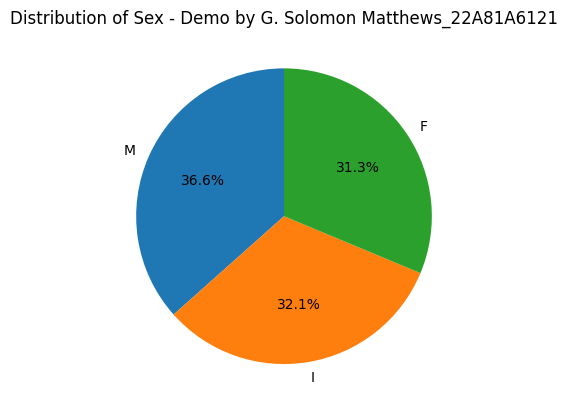

In [ ]:
x = df['Sex'].value_counts()
labels = x.index
values = x.values
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sex - Demo by G. Solomon Matthews_22A81A6121')
plt.show()


In [ ]:
print("\nMean Values of Features Grouped by 'Sex':")
print(df.groupby('Sex').mean())



Mean Values of Features Grouped by 'Sex':
       Length  Diameter    Height  WholeWeight  ShuckedWeight  VisceraWeight  \
Sex                                                                            
F    0.579093  0.454732  0.158011     1.046532       0.446188       0.230689   
I    0.427746  0.326494  0.107996     0.431363       0.191035       0.092010   
M    0.561391  0.439287  0.151381     0.991459       0.432946       0.215545   

     ShellWeight      Rings  
Sex                          
F       0.302010  11.129304  
I       0.128182   7.890462  
M       0.281969  10.705497  


In [ ]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

X = df.drop('Rings', axis=1)
y = df['Rings']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y / y.max()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0378 - mae: 0.1334 - val_loss: 0.0083 - val_mae: 0.0688
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0071 - mae: 0.0620 - val_loss: 0.0062 - val_mae: 0.0581
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 - mae: 0.0572 - val_loss: 0.0061 - val_mae: 0.0552
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0056 - mae: 0.0548 - val_loss: 0.0064 - val_mae: 0.0571
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0067 - mae: 0.0569 - val_loss: 0.0057 - val_mae: 0.0557
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - mae: 0.0539 - val_loss: 0.0057 - val_mae: 0.0551
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0055 - mae: 0.0525 - val_loss: 0.0059 - val_mae: 0.0557
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0058 - mae: 0.0533 - val_loss: 0.0059 - val_mae: 0.0544
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059 

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")
print(f"Test MAE: {test_mae}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0058 - mae: 0.0545 

Test Loss: 0.005776743404567242
Test MAE: 0.05526159331202507


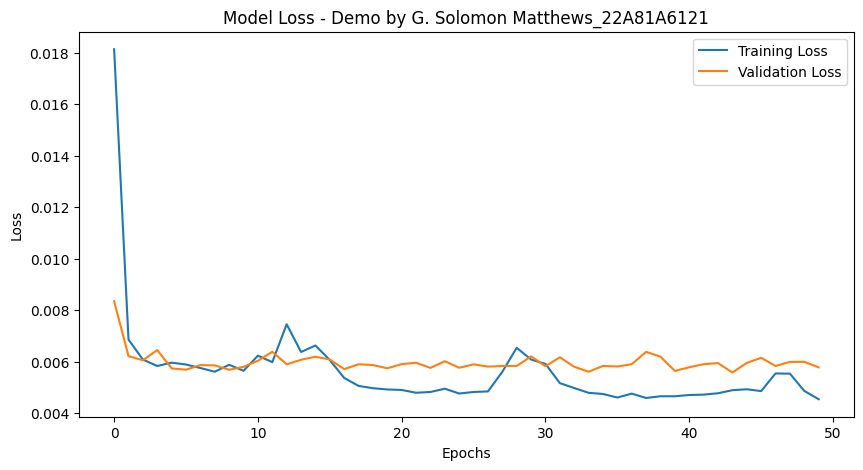

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - Demo by G. Solomon Matthews_22A81A6121')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

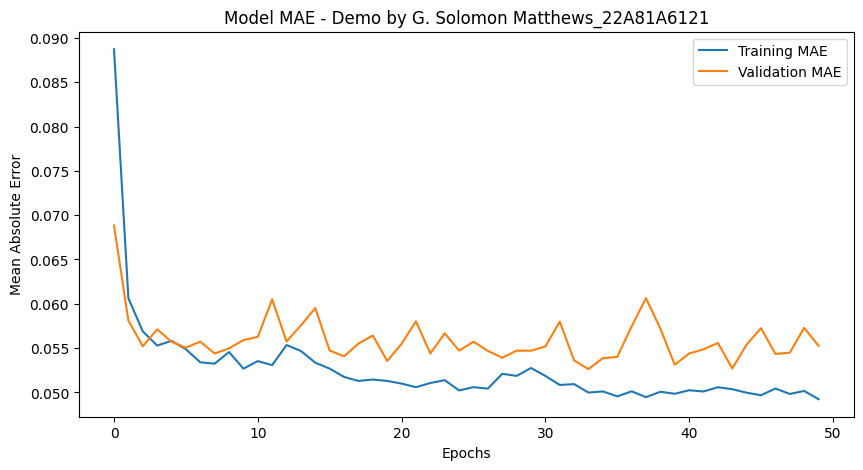

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE - Demo by G. Solomon Matthews_22A81A6121')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)

y_pred_original = y_pred.flatten() * df['Rings'].max()
y_test_original = y_test * df['Rings'].max()

print("\nSample Predictions:")
for i in range(10):
    print(f"Actual: {y_test_original.iloc[i]:.2f}, Predicted: {y_pred_original[i]:.2f}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Sample Predictions:
Actual: 9.00, Predicted: 12.90
Actual: 8.00, Predicted: 9.57
Actual: 16.00, Predicted: 15.68
Actual: 9.00, Predicted: 11.28
Actual: 14.00, Predicted: 13.15
Actual: 11.00, Predicted: 10.89
Actual: 7.00, Predicted: 8.78
Actual: 6.00, Predicted: 8.78
Actual: 7.00, Predicted: 7.49
Actual: 10.00, Predicted: 10.01


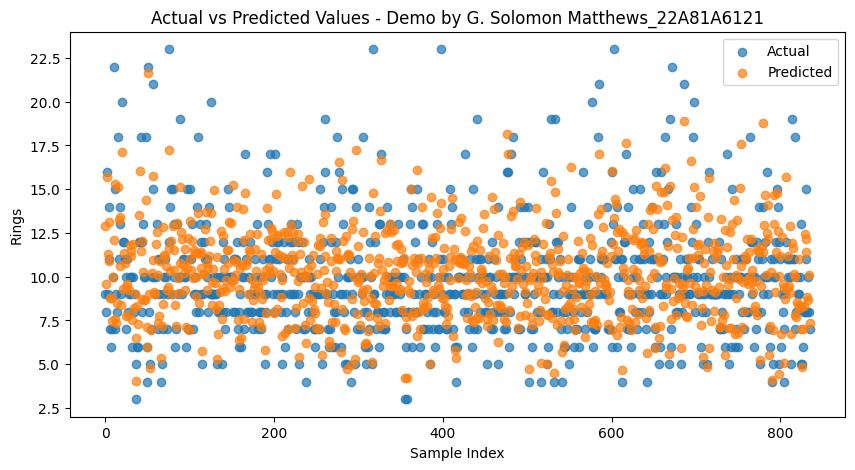

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test_original)), y_test_original, label='Actual', alpha=0.7)
plt.scatter(range(len(y_pred_original)), y_pred_original, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Values - Demo by G. Solomon Matthews_22A81A6121')
plt.xlabel('Sample Index')
plt.ylabel('Rings')
plt.legend()
plt.show()


Expt 2:  Demonstrate the process of saving and loading weights of the neural network constructed in  experiment 1 manually and with checkpoints.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Demo by G. Solomon Matthews_22A81A6121")


Demo by G. Solomon Matthews_22A81A6121


In [ ]:
model.save_weights('model_weights_manual.weights.h5')
print("Model weights saved manually to 'model_weights_manual.weights.h5'")

Model weights saved manually to 'model_weights_manual.weights.h5'


In [ ]:
del model

In [ ]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.load_weights('model_weights_manual.weights.h5')
print("Model weights loaded successfully.")

Model weights loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss after loading weights: {test_loss}")
print(f"Test MAE after loading weights: {test_mae}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mae: 0.0545
Test Loss after loading weights: 0.005776743404567242
Test MAE after loading weights: 0.05526159331202507


In [ ]:
checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, 'model_checkpoint.weights.h5')

In [ ]:
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

In [ ]:
print("\nTraining the model with checkpointing...")

history_with_checkpoint = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint_callback]
)


Training the model with checkpointing...
Epoch 1/10
102/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - mae: 0.0501
Epoch 1: val_loss improved from inf to 0.00579, saving model to ./checkpoints/model_checkpoint.weights.h5
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0047 - mae: 0.0501 - val_loss: 0.0058 - val_mae: 0.0549
Epoch 2/10
 98/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - mae: 0.0511
Epoch 2: val_loss improved from 0.00579 to 0.00574, saving model to ./checkpoints/model_checkpoint.weights.h5
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - mae: 0.0510 - val_loss: 0.0057 - val_mae: 0.0537
Epoch 3/10
 82/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - mae: 0.0502
Epoch 3: val_loss did not improve from 0.00574
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048 - mae: 0.0501 - val_loss: 0.0062 - val_mae: 0.0588
Epoch 4/10
 87/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - mae: 0.0499
Epoch 4: val_loss did not improve from 0.00574
105

In [ ]:
model.load_weights(checkpoint_path)
print("Model weights loaded successfully from the checkpoint.")


Model weights loaded successfully from the checkpoint.


In [ ]:
test_loss_checkpoint, test_mae_checkpoint = model.evaluate(X_test, y_test)
print(f"Test Loss after loading checkpoint weights: {test_loss_checkpoint}")
print(f"Test MAE after loading checkpoint weights: {test_mae_checkpoint}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - mae: 0.0536 
Test Loss after loading checkpoint weights: 0.005735194310545921
Test MAE after loading checkpoint weights: 0.053698278963565826
